In [4]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
data1=pd.read_csv("C:\\Users\\91890\Documents\\DataVisualization_Projetcs\\titanic\\train.csv")
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 20.80000000000002, 'Survived(0=not survived,1=survived)')

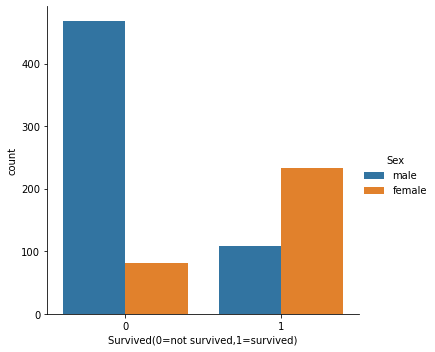

In [5]:
#No of people survived
%matplotlib inline
# Let's first check gender
sns.catplot('Survived',data=data1,kind='count',hue='Sex')
plt.xlabel('Survived(0=not survived,1=survived)')

Text(0, 0.5, 'Count')

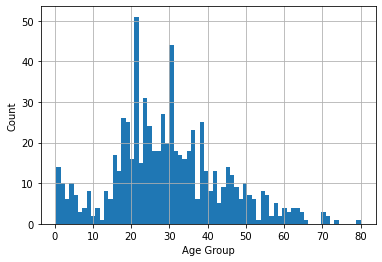

In [6]:
#Age Group

data1['Age'].hist(bins=70)
plt.xlabel('Age Group')
plt.ylabel('Count')

In [7]:
#Function for Creating new coluimn Person(male,female,child)
def Person(d1):
    age,sex=d1
    if age<15 :
        return 'Child'
    else:
        return sex


In [8]:
data1['Person']= data1[['Age','Sex']].apply(Person,axis=1)

In [10]:

data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


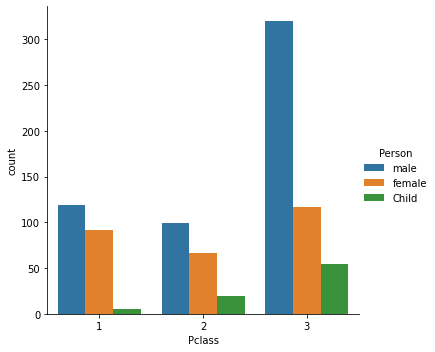

In [11]:
#Pclass analaysis
sns.catplot('Pclass',data=data1,kind='count',hue='Person')

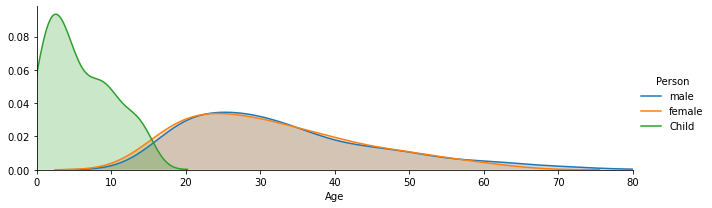

In [12]:
#FacetGrid

f1=sns.FacetGrid(data1,hue='Person',aspect=3)
f1.map(sns.kdeplot,'Age',shade=True)
oldest = data1['Age'].max()
f1.set(xlim=(0,oldest))
f1.add_legend()

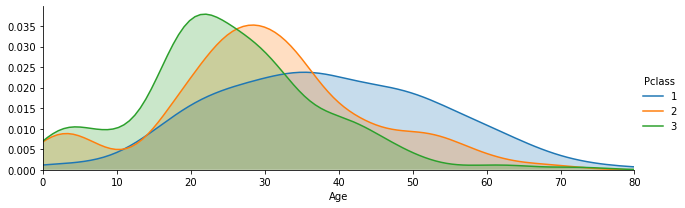

In [13]:
f1=sns.FacetGrid(data1,hue='Pclass',aspect=3)
f1.map(sns.kdeplot,'Age',shade=True)
oldest = data1['Age'].max()
f1.set(xlim=(0,oldest))
f1.add_legend()

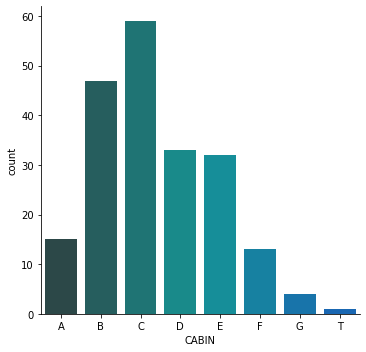

In [14]:
#To analyse passenegers on basis on cabin
cabin=data1['Cabin'].dropna()
li=[]
for i in cabin:
    li.append(i[0])
li.sort()
cabin_df = DataFrame(li)
cabin_df.columns = ['CABIN']
sns.catplot('CABIN',data=cabin_df,kind='count',palette='winter_d')

In [35]:
#To analyze people survival data on each cabins


c=data1[['Cabin','Survived']].dropna()

In [36]:
li=[]
for i in c['Cabin']:
    li.append(i[0])
cdf = DataFrame(li)
cdf
#t=pd.concat(cdf,c)
c.index=np.arange(204)
c=pd.concat([c,cdf],axis=1)
c

,Cabin,Survived,0
0,C85,1,C
1,C123,1,C
2,E46,0,E
3,G6,1,G
4,C103,1,C
...,...,...,...
199,D35,1,D
200,B51 B53 B55,0,B
201,C50,1,C
202,B42,1,B


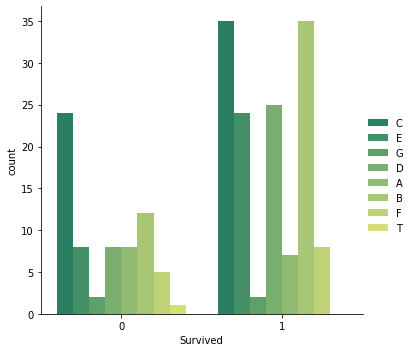

In [40]:
sns.catplot('Survived',data=c,kind='count',palette='summer',hue=0)

In [ ]:
#SibSp =Person who came with Sibilings 
#Parch= Person who came with parents or children


Let us analyze survival rate of people who came alone vs person with accompanions

In [51]:
data1['Alone']=data1.SibSp+data1.Parch
data1.head()
data1['Alone'].loc[data1['Alone']==0]='Alone'
data1['Alone'].loc[data1['Alone']!='Alone']='With Family'
data1.head()

C:\Users\91890\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


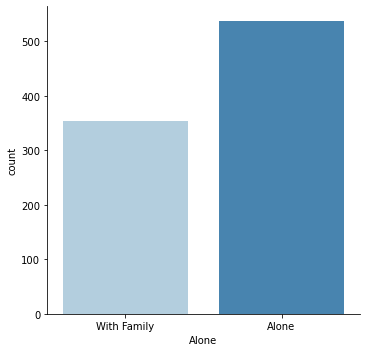

In [56]:
sns.catplot('Alone',data=data1,palette='Blues',kind='count')

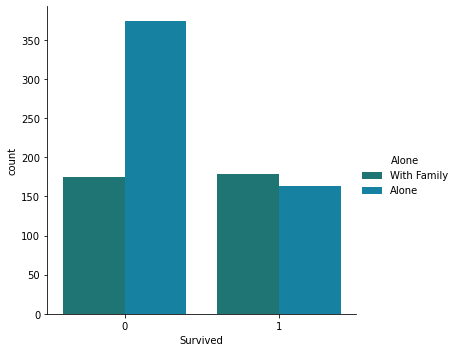

In [53]:
sns.catplot('Survived',data=data1,kind='count',palette='winter_d',hue='Alone')

Peope who came alone had less survival rate

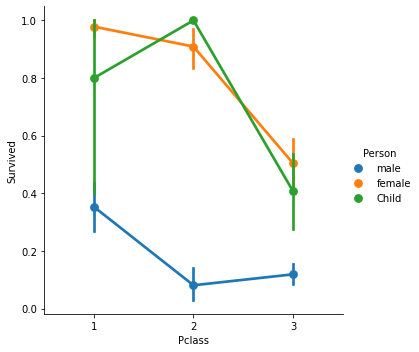

In [66]:
#Survival rate among Pclass

sns.catplot('Pclass','Survived',data=data1,hue='Person',kind='point')

From graph,it is clear men had less survival rate irrespective of theio classes whereas children and female had better survival rate

# Let's use a linear plot on age versus survival

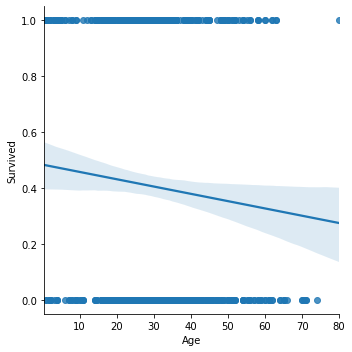

In [67]:
sns.lmplot('Age','Survived',data=data1)

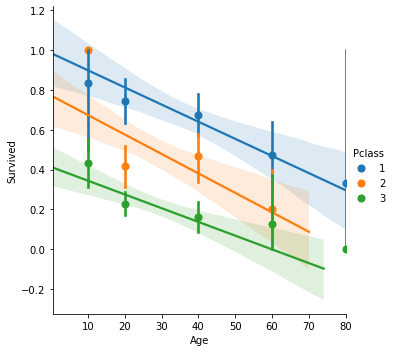

In [71]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',data=data1,hue='Pclass',x_bins=generations)

1)Its clear people in class 3 have less percentage of survival
2)People in class 1 had better survival rate

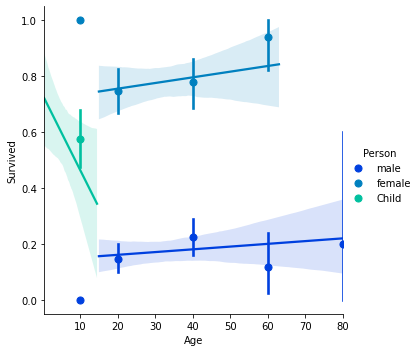

In [73]:
sns.lmplot('Age','Survived',hue='Person',data=data1,palette='winter',x_bins=generations)

1)Percentage of male who survived is less





1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
2.) Did having a family member increase the odds of surviving the crash?